In [2]:
# Библиотека для работы с данными
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# если надо указать свои заголовки и разделитель
# data = pd.read_csv('power.csv', names = ['страна', 'год', 'количество', 'категория'], sep = '\t', header=0)
# data.head()

In [6]:
# количество строк в датафрейме

len(df)

891

In [7]:
# или так
df.shape

(891, 12)

## Основные сведения о датафрейме

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
# Статистика
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Список колонок
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Значение в колонке
df['PassengerId'].head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [12]:
## Метод value_counts позволяет получить количество строк для каждого значения
## примените его к полю survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [13]:
## Метод unique позволяет получить список значений (уникальных) для столбца
## примените его к Embarked

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
# Фильтрация наборов колонок
df[['Pclass', 'Survived']].head()

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [16]:
# Сводные таблицы
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
## Посчитайте среднюю виживаемост ьв зависимости от пола
##

In [18]:
df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


## Отображение данных

In [19]:
import matplotlib.pyplot as plt

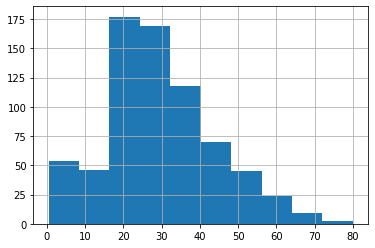

In [20]:
df['Age'].hist()

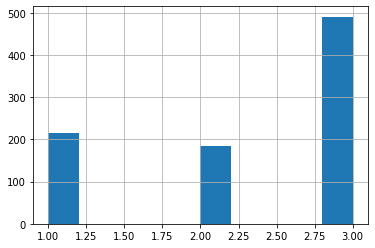

In [21]:
df['Pclass'].hist()

## Подготовим данные для машинного обучения

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалим колоноки, которые нам кажутся мало информативными
* Имя
* Билет
* Каюта
* Информацию по родственникам

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
## Постройте датафрейм df_filtered без этих колонок (Name, SibSp, Parch, Ticket, Cabin)

In [25]:
df_filtered = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare',  'Embarked']]

In [26]:
df_filtered.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.0,7.2500,S
1,2,1,1,female,38.0,71.2833,C
2,3,1,3,female,26.0,7.9250,S
3,4,1,1,female,35.0,53.1000,S
4,5,0,3,male,35.0,8.0500,S


In [27]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 48.8+ KB


## Видим, что есть пустые значения, попробуем с ними разобраться

In [28]:
df_filtered['Age'].isna().head()

0    False
1    False
2    False
3    False
4    False
Name: Age, dtype: bool

In [29]:
df_filtered[df_filtered['Age'].isna()].head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
5,6,0,3,male,NaN,8.4583,Q
17,18,1,2,male,NaN,13.0000,S
19,20,1,3,female,NaN,7.2250,C
26,27,0,3,male,NaN,7.2250,C
28,29,1,3,female,NaN,7.8792,Q


## Посчитаем средний возраст и заменим им пропущенные значения

In [30]:
df_filtered['Age'].mean()

29.69911764705882

In [31]:
df_filtered['Age_rep'] = df_filtered['Age'].fillna(29.69)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Fare           891 non-null float64
Embarked       889 non-null object
Age_rep        891 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


## Аналогично заменим неизвестный пункт назначения на самый вероятный

In [33]:
## Практика

In [34]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
df_filtered['Embarked_rep'] = df_filtered['Embarked'].fillna('S')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             714 non-null float64
Fare            891 non-null float64
Embarked        889 non-null object
Age_rep         891 non-null float64
Embarked_rep    891 non-null object
dtypes: float64(3), int64(3), object(3)
memory usage: 62.7+ KB


## Разберемся с полом. Добавим столбец is_male

In [37]:
df_filtered['Sex'] == 'male'

0       True
1      False
2      False
3      False
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12      True
13      True
14     False
15     False
16      True
17      True
18     False
19     False
20      True
21      True
22     False
23      True
24     False
25     False
26      True
27      True
28     False
29      True
       ...  
861     True
862    False
863    False
864     True
865    False
866    False
867     True
868     True
869     True
870     True
871    False
872     True
873     True
874    False
875    False
876     True
877     True
878     True
879    False
880    False
881     True
882    False
883     True
884     True
885    False
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [38]:
df_filtered['is_male'] = df_filtered['Sex'] == 'male'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df_filtered.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Age_rep,Embarked_rep,is_male
0,1,0,3,male,22.0,7.2500,S,22.0,S,True
1,2,1,1,female,38.0,71.2833,C,38.0,C,False
2,3,1,3,female,26.0,7.9250,S,26.0,S,False
3,4,1,1,female,35.0,53.1000,S,35.0,S,False
4,5,0,3,male,35.0,8.0500,S,35.0,S,True


## Профильтруем

In [40]:
df_filtered.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
       'Age_rep', 'Embarked_rep', 'is_male'],
      dtype='object')

In [41]:
df_filtered = df_filtered[['PassengerId', 'Survived', 'Pclass', 'Fare', 'Age_rep', 'Embarked_rep', 'is_male']]

In [42]:
df_filtered.head()

,PassengerId,Survived,Pclass,Fare,Age_rep,Embarked_rep,is_male
0,1,0,3,7.2500,22.0,S,True
1,2,1,1,71.2833,38.0,C,False
2,3,1,3,7.9250,26.0,S,False
3,4,1,1,53.1000,35.0,S,False
4,5,0,3,8.0500,35.0,S,True


## Осталось заменить Embarked_rep на цифры. Используем принцип one_hot

In [43]:
df_filtered = pd.get_dummies(df_filtered, ['Embarked_rep'])

In [44]:
df_filtered.head()

,PassengerId,Survived,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,1,0,3,7.2500,22.0,True,0,0,1
1,2,1,1,71.2833,38.0,False,1,0,0
2,3,1,3,7.9250,26.0,False,0,0,1
3,4,1,1,53.1000,35.0,False,0,0,1
4,5,0,3,8.0500,35.0,True,0,0,1


# Переходим к машинному обучению :-)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import  SVC

In [46]:
df_filtered.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Fare', 'Age_rep', 'is_male',
       'Embarked_rep_C', 'Embarked_rep_Q', 'Embarked_rep_S'],
      dtype='object')

In [47]:
# Формируем признаки и целевую переменную
X, y = df_filtered[['PassengerId', 'Pclass', 'Fare', 'Age_rep', 'is_male', 'Embarked_rep_C', 'Embarked_rep_Q', 'Embarked_rep_S']], df_filtered['Survived']

In [48]:
# Разделяем данные на данные для обучения и проверки

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
X_train.head()

,PassengerId,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
559,560,3,17.4000,36.00,False,0,0,1
573,574,3,7.7500,29.69,False,0,1,0
789,790,1,79.2000,46.00,True,1,0,0
561,562,3,7.8958,40.00,True,0,0,1
452,453,1,27.7500,30.00,True,1,0,0


In [51]:
y_train.head()

559    1
573    1
789    0
561    0
452    0
Name: Survived, dtype: int64

In [52]:
# Приводим данные к одному масштабу
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
X_train

array([[ 0.46035289,  0.81732947, -0.3035493 , ..., -0.49912204,
        -0.29217435,  0.62065611],
       [ 0.514999  ,  0.81732947, -0.51255052, ..., -0.49912204,
         3.42261387, -1.61119819],
       [ 1.35811039, -1.60741463,  1.03492486, ...,  2.00351803,
        -0.29217435, -1.61119819],
       ...,
       [ 0.0973466 , -0.39504258, -0.68040125, ..., -0.49912204,
        -0.29217435,  0.62065611],
       [ 0.6945505 , -0.39504258, -0.45299059, ..., -0.49912204,
        -0.29217435,  0.62065611],
       [ 1.54546847,  0.81732947, -0.50605307, ..., -0.49912204,
        -0.29217435,  0.62065611]])

In [54]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [55]:
X_train.head()

,PassengerId,Pclass,Fare,Age_rep,is_male,Embarked_rep_C,Embarked_rep_Q,Embarked_rep_S
0,0.460353,0.817329,-0.303549,0.507821,-1.367833,-0.499122,-0.292174,0.620656
1,0.514999,0.817329,-0.512551,0.003188,-1.367833,-0.499122,3.422614,-1.611198
2,1.358110,-1.607415,1.034925,1.307556,0.731083,2.003518,-0.292174,-1.611198
3,0.468159,0.817329,-0.509393,0.827715,0.731083,-0.499122,-0.292174,0.620656
4,0.042700,-1.607415,-0.079387,0.027980,0.731083,2.003518,-0.292174,-1.611198


## Обучаем наши модели

In [70]:
logistic = LogisticRegression()


In [71]:
logistic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
## Обучите модель SVC


## Оценим качество

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [61]:
accuracy_score(y_test, logistic.predict(X_test))

0.7877094972067039

In [62]:
precision_score(y_test, logistic.predict(X_test))

0.7424242424242424

In [63]:
recall_score(y_test, logistic.predict(X_test))

0.7

In [64]:
f1_score(y_test, logistic.predict(X_test))

0.7205882352941176

In [65]:
accuracy_score(y_test, tree.predict(X_test))

0.7486033519553073

In [66]:
precision_score(y_test, tree.predict(X_test))

0.6623376623376623

In [67]:
recall_score(y_test, tree.predict(X_test))

0.7285714285714285

In [68]:
f1_score(y_test, tree.predict(X_test))

0.6938775510204082

In [69]:
## Посчитайте метрики для SVC